## Partie 3 : Représentation fréquentielle des signaux

Les packages à ajouter en plus des précédents pour cette partie sur la représentation fréquentielle des signaux sont les suivants :

In [1]:
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy import signal
from scipy.io.wavfile import read
import random

### 3.1 Séries de Fourier

**Exercice 3.1** Un signal carré antisymétrique $s$ de fréquence $F_{0}$ est périodique et peut donc être représenté par une série de Fourier, $$s(t)=\sum_{n=0}^{\infty}\dfrac{1}{2n+1} \sin{(2\pi (2n+1) F_{0}t)}.$$

Ce signal est une somme de signaux sinusoïdaux de fréquences $(2n+1)F_{0}$ (avec $n\in\mathbb N$) et d'amplitude $\frac{1}{2n+1}$. 

Écrivez un petit programme basé sur une boucle qui permet de dessiner successivement les  premiers termes de cette série (d'abord seulement le premier terme $n=0$, ensuite les deux premiers, jusqu'aux 6 premiers termes). Considérez $F_{0}=1$ Hz et `t = np.arange(0, 10.01, 0.01)`.

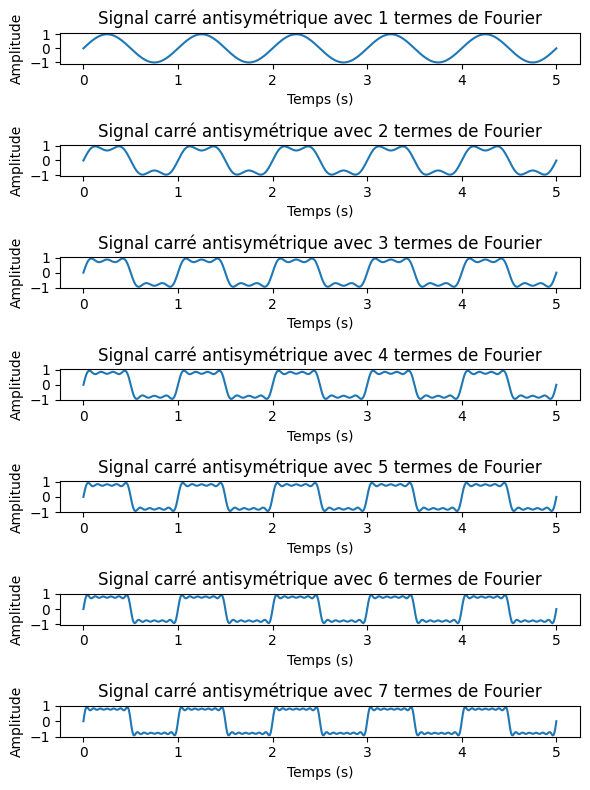

In [22]:
F_zero = 1      # Freq Fondamentale à 1Hz
t = np.arange(0, 5.01, 0.01)   # Temps allant de 0 à 10 s avec un pas de 0.01 s
Nb_termes = 7

# Initialisation du signal
signal_total = np.zeros_like(t)  # Signal total initialisé à zéro

fig, ax = plt.subplots(7, 1, figsize=(6, 8))

# Boucle pour ajouter les termes de la série de Fourier
for n in range(Nb_termes):  # De n = 0 à n = 6 (7 termes)

    # Calcul du terme n-ième de la série de Fourier
    term = (1 / ((2*n + 1))) * np.sin(2 * np.pi * (2*n + 1) * F_zero * t)   # C'est la formule de série de Fourier représentée au dessus

    signal_total += term

    # # FIGURE : Visualisation du signal après ajout de chaque terme
    # plt.plot(t, signal_total, label=f"{n+1} termes")
    # plt.title(f"Signal carré antisymétrique avec {n+1} termes de Fourier")
    # plt.xlabel("Temps (s)")
    # plt.ylabel("Amplitude")
    # plt.grid(True)
    # plt.pause(1)  # Pause pour visualiser chaque étape (1 seconde)

    # SOUS-FIGURE : Visualisation du signal après ajout de chaque terme
    ax[n].plot(t, signal_total)
    ax[n].set_title(f"Signal carré antisymétrique avec {n+1} termes de Fourier")
    ax[n].set_xlabel("Temps (s)")
    ax[n].set_ylabel("Amplitude")

# Afficher le résultat final
plt.tight_layout()
plt.show()

**Exercice 3.2** Sur base du code de l'exercice 3.1, constatez que plus $n$ augmente, plus les signaux obtenus s'approchent d'un signal carré. Visualisez le spectre de ces signaux en exécutant les lignes suivantes :

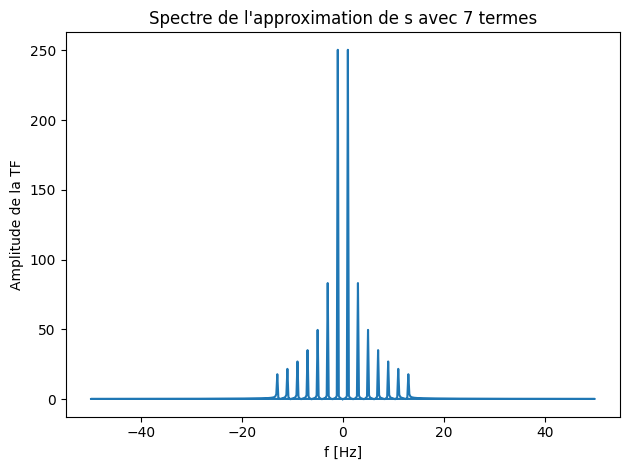

In [23]:
Fe = 100    # Fréquence d'échantillonage
f  = fft.fftfreq(len(t), 1/Fe) # Vecteur des fréquences
TF = fft.fft(signal_total)     # Transformée de Fourier

fig, ax = plt.subplots()
ax.plot(f, np.abs(TF))      # np.abs() = 'absolute' et donc calcul la valeur absolue du nombre ou de tous les nombres d'un 'array'.
ax.set_title(f"Spectre de l'approximation de s avec {Nb_termes} termes")
ax.set_xlabel('f [Hz]')
ax.set_ylabel('Amplitude de la TF')

plt.tight_layout()
plt.show()

**Exercice 3.3** Représentez le spectre bilatéral du signal $3+2\cos{(600t)}-3\sin{(2\pi20t)}$.

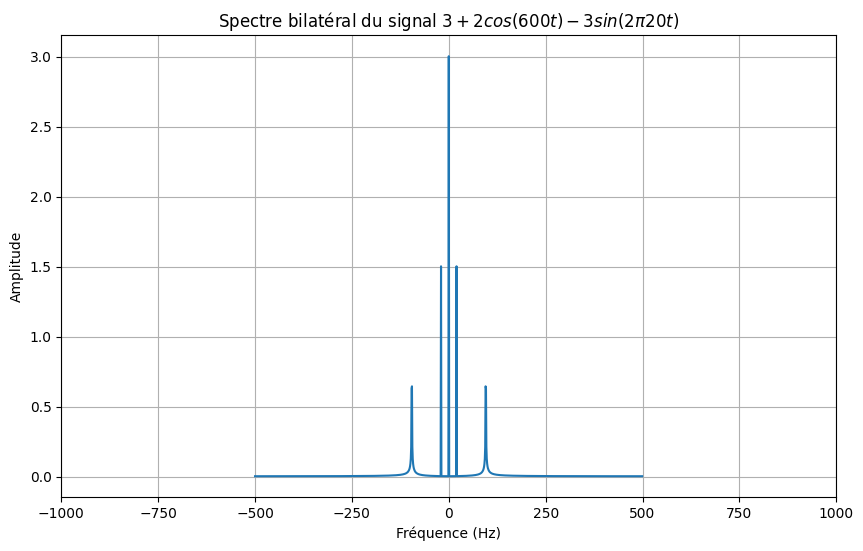

In [3]:
# Définir les paramètres
fe = 1000  # Fréquence d'échantillonnage (Hz)
Te = 1/fe  # Période d'échantillonnage (s)
t = np.arange(0, 1, Te)  # Vecteur temps de 0 à 1s avec un pas de Te

# Définir le signal s(t)
signal = 3 + 2 * np.cos(600 * t) - 3 * np.sin(2 * np.pi * 20 * t)

# Appliquer la FFT pour obtenir le spectre fréquentiel
fft_signal = np.fft.fft(signal)  # Transformation de Fourier rapide
n = len(signal)  # Nombre d'échantillons

# Fréquences associées aux coefficients FFT
frequencies = np.fft.fftfreq(n, Te)

# Shift du spectre pour avoir le spectre bilatéral centré sur 0 Hz
fft_signal_shifted = np.fft.fftshift(fft_signal)
frequencies_shifted = np.fft.fftshift(frequencies)

# Calcul de l'amplitude du spectre (partie réelle uniquement)
amplitude_spectrum = np.abs(fft_signal_shifted) / n

# Affichage du spectre bilatéral
plt.figure(figsize=(10, 6))
plt.plot(frequencies_shifted, amplitude_spectrum)
plt.title('Spectre bilatéral du signal $3 + 2cos(600t) - 3sin(2\\pi20t)$')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim([-1000, 1000])  # Limite des fréquences affichées (-1000 Hz à 1000 Hz)
plt.show()

### **À Faire !!**
**Exercice 3.4** Calculez théoriquement les expressions des spectres des fonctions suivantes et dessinez-les (représentation cartésienne et représentation polaire) :

- $\sin{(2 \pi t)}$
- $\cos{(2 \pi t)}-\sin{(2 \pi t)}$
- $\sin{(2 \pi t + \frac{\pi}{4})}$
- $\cos{(2 \pi t)}+\cos{(2 \pi t+\frac{\pi}{2})}$
- $\cos{(2 \pi t)}+0{,}5\cos{(2 \pi 2t)}+0{,}25\cos{(2 \pi 4t+\frac{\pi}{4})}$
- $\cos{(2 \pi t)} \cos{(2 \pi 440t)}$

Rappelez-vous que la transformée de Fourier est une <i>opération linéaire</I>, c'est-à-dire que la transformée de Fourier d'une somme de signaux est égale à la somme des transformées de Fourier de chaque signal pris séparément.

Formules utiles:

- $\sin{(a+b)}=\sin{(a)} \cos{(b)} + \sin{(b)} \cos{(a)}$
- $\cos{(a+b)}=\cos{(a)} \cos{(b)} - \sin{(a)} \sin{(b)}$
- $2 \cos{(a)} \cos{(b)}=\cos{(a+b)} + \cos{(a-b)}$
- $\cos{(\alpha)} = \frac{e^{j \alpha} + e^{-j \alpha}}{2}$
- $\sin{(\alpha)} = \frac{e^{j \alpha} - e^{-j \alpha}}{2j}$

Représentation et calcul de l'équation : **$\sin{(2 \pi t)}$** :

C:\Users\pc\AppData\Local\Temp\ipykernel_12264\3349762154.py:32: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  plt.polar(phase_spectrum, amplitude_spectrum)


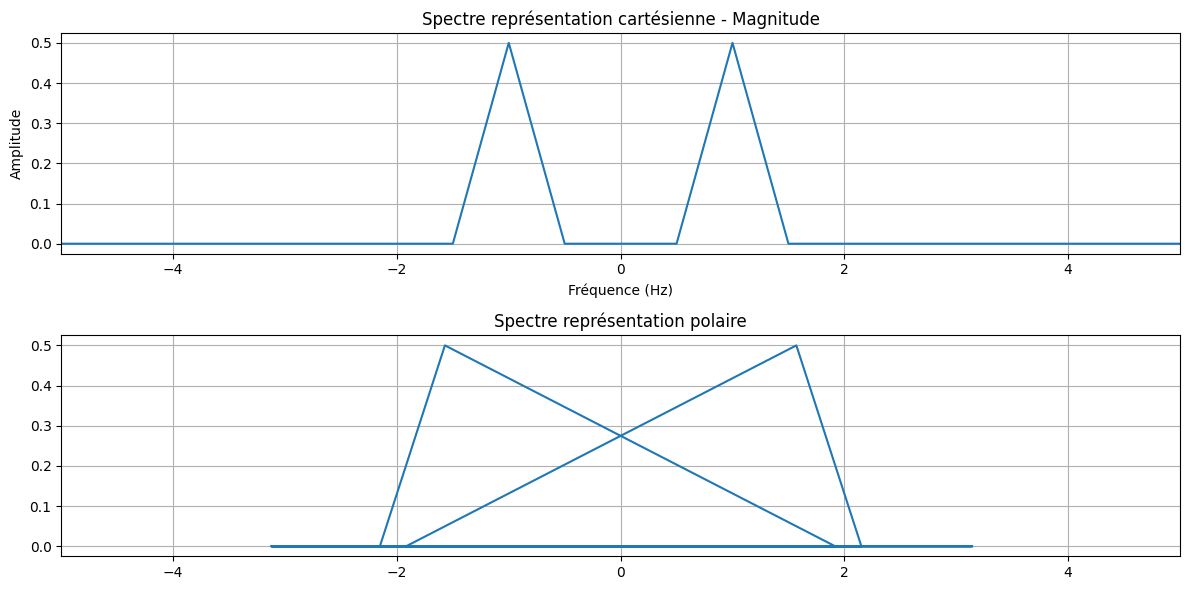

In [11]:
# Paramètres du signal
fe = 100  # Fréquence d'échantillonnage
Te = 1/fe  # Période d'échantillonnage
t = np.arange(0, 2, Te)  # Temps de 0 à 2 s
signal = np.sin(2 * np.pi * t)  # Signal sinusoïdal

# Calcul de la FFT (transformée de Fourier rapide)
fft_signal = np.fft.fft(signal)
n = len(signal)  # Nombre de points
frequencies = np.fft.fftfreq(n, Te)  # Fréquences associées à la FFT
fft_signal_shifted = np.fft.fftshift(fft_signal)
frequencies_shifted = np.fft.fftshift(frequencies)

# Magnitude (amplitude du spectre)
amplitude_spectrum = np.abs(fft_signal_shifted) / n

# Phase (angle du spectre)
phase_spectrum = np.angle(fft_signal_shifted)

# Représentation cartésienne du spectre
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies_shifted, amplitude_spectrum)
plt.title("Spectre représentation cartésienne - Magnitude")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim([-5, 5])  # Limite des fréquences affichées (-5 Hz à 5 Hz)

# Représentation polaire du spectre (magnitude vs phase)
plt.subplot(2, 1, 2)
plt.polar(phase_spectrum, amplitude_spectrum)
plt.title("Spectre représentation polaire")
plt.grid(True)
plt.xlim([-5, 5])  # Limite des fréquences affichées (-5 Hz à 5 Hz)

# Affichage
plt.tight_layout()
plt.show()

**Exercice 3.5** Dans le tableau de la page 21 du PDF, faites correspondre chaque signal à son spectre.

*Dans l'exercice ci-dessus les réponses sont :*

- Le `1` correspond avec le `5`
- Le `2` correspond avec le `1`
- Le `3` correspond avec le `3`
- Le `4` correspond avec le `2`
- Le `5` correspond avec le `4`

**À RETENIR :**
- Dans une représentation **Spectrale** une fonction Sinus va présenter `2` pics de fréquences (Positif et Négatif) au **minimum** si c'est un **Sinus simple**. (*figure 5*)
- Dans une représentation **Spectrale** (ou **Fréquentiel**) une fonction Sinus décalée vers le haut (ou vers le bas) et donc ayant dans son équation une **constante**, va avoir `1` pic de fréquence en `0`. Cette amplitude représente également la **moyenne** du signal. (*figure 1*)
- Pour les **Sinus complexes** je vais avoir des représentations **Spectrales** dotées de plus que `2` pics car le Sinus est décomposable en plusieurs Sinus qui sont les harmoniques du signal `Porteur` / `Fondamental`. Ces différents Sinus ont des **amplitudes différentes** qui composent le **Signal Final.** Ces amplitudes sont visibles sur une représentation `Spectrale`.
- L'amplitude dans le domaine **Fréquentiel** équivaut à la **moitié** de l'amplitude du Sinus dans le domaine **Temporel** !
- Une `Harmonique` est un multiple de la **Fréquence Fondamentale** tel que l'Harmonique de Rang 2 est égale à `F1 * 2`. 
***Ex : 440Hz * 2 = 880Hz***

- La `bande passante` d'un signal est l'intervalle de fréquences pour lesquelles le signal a une puissance significative, c'est-à-dire celles qu'il utilise pour transmettre de l'information. Elle est généralement mesurée en hertz (Hz) et indique la différence entre la fréquence la plus haute et la plus basse présentes dans le signal.

*Ex : Pour un signal audio qui contient des fréquences allant de 20 Hz à 20 kHz, la bande passante est de 20 kHz - 20 Hz = 19,980 Hz (soit environ 20 kHz). Dans un système de communication, si un canal radio émet sur une fréquence centrale de 100 MHz avec une bande passante de 5 MHz, cela signifie qu'il transmet des fréquences de 97.5 MHz à 102.5 MHz.*

#### **Fonctions à retenir :**
- `np.abs()` calcul la valeur **absolue** du ou des nombres d'un array passé en paramètre, éliminant ainsi les composantes négatives.
- `np.linspace(a, b, n)` permet d'avoir un vecteur ayant l'indice 1 commençant avec le nombre `a`, et qui va être composés de nombre jusqu'à arriver au dernier indice ayant pour valeur `b` le tout espacé de manière régulière par pas de `n`.